<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
        Getting Started with File-Based Vector Store on AI-ON-PREM
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style="font-size:24px;font-family:Arial;color:#00233C"><b>Introduction</b></p>

<p style="font-size:16px;font-family:Arial;color:#00233C">
Vector stores are specialized databases designed for efficient storage, indexing, and searching of high-dimensional vector embeddings. These embeddings, generated by AI models, enable similarity search and power applications in machine learning, NLP, recommendation systems, and image/video retrieval.
</p>

<p style="font-size:16px;font-family:Arial;color:#00233C">
This notebook provides an in-depth exploration of vector stores in the Teradata Database, covering key concepts, vector embedding mechanisms, and efficient search techniques.
</p>

---

<p style="font-size:24px;font-family:Arial;color:#00233C"><b>Key Concepts</b></p>

<p style="font-size:18px;font-family:Arial;color:#00233C"><b>What is a Vector Store?</b></p>

<p style="font-size:16px;font-family:Arial;color:#00233C">
A vector store contains a vectorized representation of data, typically created using embeddings from AI models. It allows for high-speed similarity searches beyond traditional keyword matching.
</p>

<p style="font-size:16px;font-family:Arial;color:#00233C">
Vector embeddings are numerical representations of data (text, images, audio, etc.) mapped into a multi-dimensional space.
</p>


<p style="font-size:16px;font-family:Arial;color:#00233C">
Each embedding is a vector that captures semantic or content-based relationships. For example:
</p>

<table style="font-size:16px;font-family:Arial;color:#00233C;border:1px solid black;">
  <tr>
    <th style="border:1px solid black;padding:5px;">Data Type</th>
    <th style="border:1px solid black;padding:5px;">Example</th>
    <th style="border:1px solid black;padding:5px;">Vector Representation</th>
  </tr>
  <tr>
    <td style="border:1px solid black;padding:5px;">Text</td>
    <td style="border:1px solid black;padding:5px;">"King"</td>
    <td style="border:1px solid black;padding:5px;">[0.12, 0.45, 0.67, ...]</td>
  </tr>
  <tr>
    <td style="border:1px solid black;padding:5px;">Image</td>
    <td style="border:1px solid black;padding:5px;">A picture of a cat</td>
    <td style="border:1px solid black;padding:5px;">[0.23, 0.78, 0.55, ...]</td>
  </tr>
</table>

<p style="font-size:16px;font-family:Arial;color:#00233C">
<b>Embedding Generation is carried out by AI_TextEmbedding Function </b>
<ul style="font-size:16px;font-family:Arial;color:#00233C">
  <li>Enables text embedding generation using LLMs hosted by Nim.</b> (Performs a full-table scan)</li>
    <li> Accepts different parameters, model endpoint, key, model args etc.</li>

<p style="font-size:18px;font-family:Arial;color:#00233C"><b>Vector Search</b></p>

<p style="font-size:16px;font-family:Arial;color:#00233C">
Unlike traditional search methods, vector search understands the meaning behind a query. It provides relevant results by analyzing semantic relationships rather than exact keyword matches.
</p>

<p style="font-size:16px;font-family:Arial;color:#00233C">
Common types of embeddings include:
</p>

<ul style="font-size:16px;font-family:Arial;color:#00233C">
<li>Word Embeddings</li>
<li>Sentence Embeddings</li>
<li>Document Embeddings</li>
<li>Image Embeddings</li>
<li>Audio Embeddings</li>
</ul>

---

<p style="font-size:24px;font-family:Arial;color:#00233C"><b>Vector Store in the Teradata Database</b></p>

<p style="font-size:16px;font-family:Arial;color:#00233C">
A vector in Teradata is a specialized column type called <b>Vector</b>.
</p>

<p style="font-size:16px;font-family:Arial;color:#00233C">
The <b>vector store</b> in Teradata consists of schemas and tables that enable vector search functionality.
</p>

<hr>

<p style="font-size:20px;font-family:Arial;color:#00233C"><b>Vector Search Algorithms</b></p>

<p style="font-size:16px;font-family:Arial;color:#00233C">
Teradata supports three main search algorithms:
</p>

<p style="font-size:18px;font-family:Arial;color:#00233C"><b>1. VectorDistance</b></p>
<ul style="font-size:16px;font-family:Arial;color:#00233C">
  <li><b>Flat index</b> (performs a full-table scan)</li>
  <li><b>Scalable and parallel search</b></li>
  <li><b>Exact search approach</b></li>
  <li>Suitable for <b>smaller datasets (<10K documents)</b></li>
</ul>

<p style="font-size:18px;font-family:Arial;color:#00233C"><b>2. Kmeans</b></p>
<ul style="font-size:16px;font-family:Arial;color:#00233C">
  <li><b>IVF (Inverted Vector File) index</b> (organizes data into clusters)</li>
  <li><b>Scalable and parallel training/search</b></li>
  <li><b>Approximate search approach</b></li>
  <li>Suitable for <b>larger datasets (>10K documents)</b></li>
</ul>

<p style="font-size:18px;font-family:Arial;color:#00233C"><b>3. HNSW</b></p>
<ul style="font-size:16px;font-family:Arial;color:#00233C">
  <li><b>HNSW (Hierarchical Navigable Small World) index</b></li>
  <li><b>Graph-based Approximate Nearest Neighbors (ANN) search</b></li>
  <li><b>Scalable and parallel training/search</b></li>
  <li><b>Approximate search approach</b></li>
  <li>Suitable for <b>larger datasets (>10K documents)</b></li>
</ul>

<hr>


<p style="font-size:20px;font-family:Arial;color:#00233C"><b>Types of Vector Store</b></p>

<table style="font-size:15px; font-family:Arial; color:#00233C; width:100%; border:1px solid #ddd; border-collapse:collapse;">
  <tr>
    <th style="padding:10px; text-align:left; border:1px solid #ddd;">Type</th>
    <th style="padding:10px; text-align:left; border:1px solid #ddd;">Description</th>
    <th style="padding:10px; text-align:left; border:1px solid #ddd;">Use Case</th>
  </tr>
  <tr>
    <td style="padding:10px; border:1px solid #ddd;"><b>1. Content-Based</b></td>
    <td style="padding:10px; border:1px solid #ddd;">Built on the <b>contents of a table</b> (or file/PDF converted to a table). Queries return the <b>top relevant rows</b> based on similarity.</td>
    <td style="padding:10px; border:1px solid #ddd;">Can be combined with <b>LLM-generated textual responses</b> for more accurate answers.</td>
  </tr>
  <tr>
    <td style="padding:10px; border:1px solid #ddd;"><b>2. Metadata-Based</b></td>
    <td style="padding:10px; border:1px solid #ddd;">Built on the <b>metadata</b> of tables. Queries return the <b>top matching tables</b> based on similarity. Used in <b>SQL generation</b> for data retrieval.</td>
    <td style="padding:10px; border:1px solid #ddd;">Helps form textual responses by retrieving data from relevant tables for more precise answers.</td>
  </tr>
    <tr>
    <td style="padding:10px; border:1px solid #ddd;"><b>3. File-Based</b></td>
    <td style="padding:10px; border:1px solid #ddd;">Built from contents of PDF file. Queries return the <b>top relevant rows</b> based on similarity.</td>
    <td style="padding:10px; border:1px solid #ddd;">Can be combined with <b>LLM-generated textual responses</b> for more accurate answers.</td>
  </tr>
    <tr>
    <td style="padding:10px; border:1px solid #ddd;"><b>4. Embedding-Based</b></td>
    <td style="padding:10px; border:1px solid #ddd;">Built from the <b>user generated embeddings</b> . Queries return the <b>top relevant rows</b> based on similarity.</td>
    <td style="padding:10px; border:1px solid #ddd;">Can be combined with <b>LLM-generated textual responses</b> for more accurate answers.</td>
  </tr>
</table>


</ul>



<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>What You Will Do in This Notebook</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
This notebook is designed to guide you through a comprehensive set of exercises focused on working with file-based Vector Store and ask APIs. By the end of this tutorial, you will have gained hands-on experience with creating file-based vector store objects as well as asking questions and performing similarity searches and asking questions. Here's what you'll learn:
</p>

<div style = 'font-size:16px;font-family:Arial;color:#00233C'>
<ol>
<li>
<b>Installing latest teradatagenai</b>
</li>
<li>
<b>Creating a new File-based Vector Store</b>
</li>
<li>
<b>Using existing Vector Store</b>
</li>
<li>
<b>Updating Vector Store</b>
</li>
<li>
<b>Performing Similarity Seach and Asking questions</b>
</li>
<li>
<b>Destroying Vector Store</b>
</li>
</ol>
</div>


<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>Installing latest teradatagenai</b>

In [ ]:
# %pip install teradatagenai

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend([r'C:\\Aanchal\\git\\pyTeradata'])

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>Import necessary modules</b>

In [48]:
from getpass import getpass
# Required imports
from teradatagenai import VSManager, VectorStore, VSPattern, VSApi, TeradataAI, TextAnalyticsAI, load_data, remove_context
from teradataml import create_context, set_auth_token, DataFrame, in_schema

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>Connect to Vantage</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>You will be prompted to provide the password. Enter your password, press the Enter key, then use down arrow to go to next cell. Begin running steps with Shift + Enter keys.</p>

In [2]:
# Connect to Vantage using create_context.
hostname = getpass(prompt = 'hostname: ')
username = getpass(prompt = 'username: ')
password = getpass(prompt = 'password: ')

context=create_context(host=hostname, username=username, password=password)

hostname:  ········
username:  ········
password:  ········


#### Authenticate using username password

In [4]:
base_url = getpass(prompt = 'username: ')
username = getpass(prompt = 'username: ')
password = getpass(prompt = 'password: ')
set_auth_token(base_url=base_url, username=username, password=password)

Authentication token is generated and set for the session.


True

### Authenticate using keyclock JWT

In [ ]:
base_url = getpass(prompt = 'base_url: ')
auth_url = getpass(prompt = 'auth_url: ')
password = getpass(prompt = 'password: ')
set_auth_token(base_url=base_url, auth_url=auth_url, password=password)

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:30px;font-family:Arial;color:#00233C'>1. Getting Started with Vector Store </b>




### 🛠 Steps to Create a Vector Store  

1. **Initialize a VectorStore Instance**  
   - Create an instance of `VectorStore`

2. **Create the Vector Store**  
   - Use the `create()` method on the vector store instance to create a new vector store.
  
**Note: embeddings_base_url refers to NVIDIA NIM deployment endpoint and ingest_host refers to NV-INGEST service.**

By following these steps, we will successfully create vector store - `vs_pdfs`.

### 📂 Creating a Vector Store using PDF files.  

To create a vector store from a PDF document, follow these steps:

1. **Create an Instance of Vector Store (`vs_pdf`)**  
   - First, instantiate a new vector store where the PDF content will be stored.

In [4]:
pdf_vs = VectorStore('vs_pdfs')

Vector Store vs_pdfs does not exist. Call create() to create the same.


In [25]:
import os
files = ["LLM_handbook.pdf"]


2. **Call the `create` Method**  
   - Using the vector store instance, call the `create()` method and pass the PDF document file(s) as the `document_files` argument to upload and vectorize the content.


In [44]:
# Python
pdf_vs.create(embeddings_model= 'nvidia/llama-3.2-nv-embedqa-1b-v2',
              chat_completion_model='mistralai/mistral-7b-instruct-v0.3',
              chat_completion_max_tokens=8192,
              embeddings_dims=2048,
              nv_ingestor=False,
              optimized_chunking = False,
              chunk_size = 450,
              search_algorithm= 'VECTORDISTANCE',
              top_k=10,
              object_names= "temp_table",
              document_files=files,
              ingest_host = 'https://gpudev2-nvingest.labs.teradata.com',
              ingest_port = 443,
              embeddings_base_url='https://gpudev1-modelops.labs.teradata.com/serving/96bd9549-be12-4fdc-bbbd-dbef8a169be0/v1',
              completions_base_url='https://gpudev1-modelops.labs.teradata.com/serving/1107c851-e108-449f-bb6b-b7183ce9ffef/v1')

Vector store vs_pdfs creation started.
Use the 'status()' api to check the status of the operation.


In [51]:
pdf_vs.status()

,vs_name,status
0,vs_pdfs,READY


#### Check the type of Vector Store

In [67]:
pdf_vs.store_type

'file-based'

### Get the Index Embeddings table

In [52]:
df = pdf_vs.get_indexes_embeddings()

In [53]:
df.head()

DataBaseName,TableName,TD_ID,TD_FILENAME,file_splits,TD_TEMP_ID,vector_index,vector_index_normalized
VSDEMO,temp_table,37,LLM_handbook.pdf,"moved to the input of each sub-block, additionallayer normalization is added after the final self-attention block,Paper StrcutureEarly Pre-trainedLanguage ModelsIILarge Language ModelsAIII HOW LLMS ARE BUIL TAData Cleaning BLarge LanguageModel FamiliesBOther RepresentativeLLMsCDominant LLMArchitecturesTokenizations CPositional Encoding DModel Pre-training EFine-tuning andInstruction T uningFAlignment GDecoding StrategiesHI HOW L",2300001,"-0.016495,-0.006649,0.011314,0.013535,0.002167,-0.015747,0.003077,-0.027512,0.003609,0.010719,-0.008713,0.045532,-0.005558,0.019333,-0.066101,-0.016312,-0.002897,-0.022995,-0.026001,-0.003088,-0.031158,-0.000942,-0.04834,0.006893,-0.017761,-0.017746,-0.010101,0.021027,-0.014252,0.023468,-0.000587,-0.00285,0.016327,0.00156,0.00349,-0.011719,0.019485,0.045837,0.000802,-0.008095,0.014603,-0.004631,-0.032074,0.018341,-0.014328,-0.073242,0.006275,0.018005,-0.016373,-0.036407,-0.000897,0.005257,-0.027222,-0.035736,0.016754,-0.001401,-0.017715,0.0112,0.010399,0.003267,-0.023575,0.014893,0.018936,0.041229,0.002899,0.015335,0.017395,-0.007061,0.007507,0.026108,0.006077,-0.032257,-0.018631,0.017197,-0.015961,0.005066,-0.032501,0.003994,0.019913,-0.007183,0.012375,0.017502,-0.0159,0.005478,0.013672,-0.022598,-0.032959,-0.002134,0.004921,0.016815,0.000701,0.043549,-0.001478,-0.011055,0.016922,0.005863,0.047241,0.017288,0.025436,-0.013161,0.033112,-0.018234,0.007568,0.001869,0.019379,0.01162,0.006332,0.03363,0.027817,0.01","-0.0164990324141977,-0.00665062543328283,0.011316765852333,0.0135383088042537,0.00216752975092855,-0.0157508495560091,0.00307775221209374,-0.0275187256610734,0.00360988226631339,0.0107216203969557,-0.00871513000454103,0.0455431308810699,-0.00555935872434742,0.0193377261996777,-0.0661171592367917,-0.0163159876775018,-0.00289770820878634,-0.0230006214225205,-0.0260073562777541,-0.00308875490118475,-0.0311656169725111,-0.000942230283975399,-0.0483518173326654,0.00689468508221064,-0.0177653419041264,-0.0177503382371841,-0.0101034693189337,0.0210321403196929,-0.0142554840840949,0.0234737370534338,-0.000587143499674691,-0.00285069671903385,0.0163309913444441,0.00156038136199748,0.00349085317523794,-0.0117218648597746,0.0194897633580262,0.0458482054422297,0.000802196059180754,-0.00809697892651895,0.0146065698905443,-0.0046321321073143,-0.0320818409004532,0.0183454836925613,-0.0143315026632691,-0.0732599049457815,0.00627653400418856,0.0180094015530542,-0.0163770025897338,-0.0364159001578475,-0.000897219283148549,0.00"
VSDEMO,temp_table,20,LLM_handbook.pdf,"4] successfully applied NLMs to machinetranslation. The release of RNNLM (an open source NLMtoolkit) by Mikolov [41], [42] helped significantly popularizeNLMs. Afterwards, NLMs based on recurrent neural networks(RNNs) and their variants, such as long short-term memory(LSTM) [19] and gated recurrent unit (GRU) [20], were widelyused for many natural language applications including machinetranslation, text generation and text classification [",1500001,"0.009918,0.014908,-0.008255,-0.003372,-0.012581,-0.001101,-0.000786,-0.059723,0.019943,-0.003222,-0.006954,-0.042145,-0.003185,0.033142,0.006317,-0.018906,-0.005527,-0.013039,-0.052765,0.01516,-0.018341,-0.001386,-0.012253,-0.031128,0.006687,-0.025406,-0.006107,0.021042,0.003489,0.021606,0.013924,0.012863,0.042206,-0.014046,0.005875,0.001877,-0.024704,-0.009651,-0.000417,-0.036865,0.054962,0.02124,0.017212,0.019531,-0.014709,-0.002522,0.038757,-0.008705,-0.015747,-0.010536,-0.044464,0.008675,0.013435,-0.043152,-0.029236,0.018997,0.010933,-0.009048,-0.036865,0.022537,0.0159,0.041809,-0.022049,0.033722,0.013428,0.008614,-0.0215,-0.036072,0.016098,0.028717,-0.032257,0.009041,-0.021744,0.016617,0.003412,-0.009987,0.000279,-0.026505,-0.025024,-0.045258,-0.011635,0.034332,-0.011383,0.018616,-0.007256,-0.016739,-0.017792,-0.012428,0.023911,0.009216,-0.006931,0.00644

### ❓ Asking a Question Based on Uploaded Document to the Vector Store  

Once you have uploaded your PDF content into the vector store, you can ask specific questions based on the content stored in the vector store. The vector store will use its similarity search to find the most relevant information and provide a detailed response.

#### 🛠 Steps to Ask a Question from the Vector Store  

1. **Define the Question and Prompt**  
   - Formulate the question you'd like to ask and provide a prompt for context. In this case, the question is about searching for NULL and NOT NULL values in Teradata.

2. **Use the `ask` Method**  
   - Call the `ask()` method on the vector store instance, passing both the question and prompt. The vector store will then return a response based on the content of the uploaded document.


In [54]:
question= 'what are LLMs?'
prompt= 'Briefly explain, provide a syntax in educational tone.'
response = pdf_vs.ask(question=question, prompt=prompt)

In [55]:
print(response)

LLMs, or Large Language Models, are transformer-based Pre-trained Language Models (PLMs) that contain tens to hundreds of billions of parameters. They are larger in model size and exhibit stronger language understanding and generation abilities compared to smaller-scale models.

Here is a simplified syntax to represent the data you provided:

```
data = [
    {"score": 0.293603, "DatabaseName": "VSDEMO", "TableName": "temp_table", "TD_ID": 17, "TD_FILENAME": "LLM_handbook.pdf", "file_splits": "..."},
    {"score": 0.274398, "DatabaseName": "VSDEMO", "TableName": "temp_table", "TD_ID": 50, "TD_FILENAME": "LLM_handbook.pdf", "file_splits": "..."},
    {"score": 0.264761, "DatabaseName": "VSDEMO", "TableName": "temp_table", "TD_ID": 0, "TD_FILENAME": "LLM_handbook.pdf", "file_splits": "..."},
    # ... more data entries ...
]
```

This data represents a collection of rows, each row containing information about a specific document, such as its score, the database and table it belongs to, i

### ✨ Updating Data of an Existing Vector Store  

You can **add** or **delete** data in a Vector Store.

#### 🛠 Steps to Update an Existing Vector Store  

1. **Access the Existing Vector Store**  
   - First, ensure that the vector store (e.g., `vs_update`) is already initialized.

2. **Use the `update()` API**  
   - Call the `update()` method on the vector store instance and provide the new argument(s). 

In [ ]:
pdf_vs.update(document_files="SQL_Fundamentals.pdf", alter_operation="ADD")

In [63]:
pdf_vs.status()

,vs_name,status
0,vs_pdfs,READY


In [64]:
df = pdf_vs.get_indexes_embeddings()

In [65]:
df.loc[df['TD_FILENAME'] == 'SQL_Fundamentals.pdf']

DataBaseName,TableName,TD_ID,TD_FILENAME,file_splits,TD_TEMP_ID,vector_index,vector_index_normalized
VSDEMO,vs_pdfs_add_a6ce46a72cf84321b81b4071674ab835,93,SQL_Fundamentals.pdf,"etter is equivalent to its corresponding simple Latin uppercase letter. For example, 'a' is equivalent to 'A'.A full-width Latin lowercase letter is equivalent to its corresponding full-width Latin uppercase letter. For example, the full-width letter 'a' is equivalent to the full-width letter 'A'.Although different character sets have differ ent physical encodings, multibyte characters that have the same logical presentation compare as equivalent.For example, the following strings illustrate th e in",15100002,"-0.008659,0.024979,-0.012222,0.030228,0.017426,0.001388,0.035492,0.023056,-0.020477,0.001646,-0.000944,0.005753,-0.019058,-0.023209,-0.04126,0.020966,0.018234,0.011635,0.008949,0.023956,-0.053223,0.00141,-0.020615,0.001055,-0.020142,-0.011665,0.015945,0.000638,-0.019958,0.010193,0.02597,-0.005684,-0.043671,0.031067,-0.024139,0.017471,0.011093,0.00465,-0.015282,0.021729,0.029816,0.001559,-0.005825,0.014709,-0.024475,0.009697,0.018631,-0.025757,0.011292,0.017471,-0.010155,-0.023483,-0.002783,-0.00946,0.010918,0.002077,-0.026123,0.01532,-0.010765,0.022827,-0.002335,0.013527,0.028214,-0.022171,0.002541,0.033936,-0.026245,0.039093,-0.020386,-0.012489,0.007137,0.006409,0.010529,0.009102,-0.008934,-0.055145,-0.042328,0.018661,-0.028412,0.027344,0.023834,0.006168,0.031174,-0.026657,-0.019989,-0.006824,0.005081,-0.012863,0.062622,-0.016541,0.014328,0.005142,-0.017975,0.023849,0.006413,0.01947,0.002205,0.043243,0.027481,0.03598,-0.007545,0.006706,0.027496,-0.006783,0.02063,0.003323,-0.000301,0.025986,-0.007668,-0.00103","-0.00865788212285781,0.0249757752104013,-0.0122204221394582,0.0302240975643545,0.0174237503029126,0.00138782080916118,0.0354874179818073,0.0230530234697551,-0.0204743564187273,0.00164578750135396,-0.000943878129573597,0.00575225728753909,-0.019055539611667,-0.0232060037174509,-0.041254673332846,0.0209632932888136,0.01823164599009,0.0116334979211746,0.0089478446838497,0.02395290727973,-0.0532161289092114,0.00140981796896056,-0.0206123386029234,0.00105486379947049,-0.0201393996672366,-0.0116634940481737,0.015942941500054,0.000637917634182155,-0.0199554234216418,0.0101916840834149,0.0259666472722736,-0.00568326619544102,-0.0436653620726785,0.0310629892494311,-0.0241358836544248,0.0174687444934113,0.0110915678933897,0.00464939968486994,-0.0152800270933726,0.0217261947854922,0.0298121507535661,0.0015587987330564,-0.00582424799233708,0.0147071010676886,-0.0244718402768154,0.00969574811702878,0.0186285947373789,-0.0257536747705796,0.0112905422024842,0.0174687444934113,-0.010153688989216,-0.0234799683440432,-0.002782"
VSDEMO,vs_pdfs_add_a6ce46a72cf84321b81b4071674ab835,179,SQL_Fundamentals.pdf,"e SELECT statement. Columns in a relational table are not ordered logically.As long as a statement is otherwise constructed properly, the spacing between statement elements is not important as long as at least one pad character separates each element that is not otherwise separated from the next.For example, the SELECT statement in the above example could just as well be formulated like this: SELECT name, salary,jobtitleFROM employee; Notice that there are multiple pad characters between most of the",6500002,"-0.024734,-0.005394,-0.009827,0.017914,0.004391,-0.022415,0.03598,-0.003334,-0.003872,0.021011,-0.011803,-0.01461,0.023911,-0.00478,0.006382,-0.031403,0.011131,-0.018097,0.01683,0.03186,-0.004826,0.003229,-0.011482,-0.009178,-0.040283,-0.02594,-0.026428,0.005306,0.009293,0.022461,-0.026276,0.00927,0.001614,-0.023621,-0.016968,0.024734,0.032104,-0.019806,-0.004093,0.004635,-0.022614,-0.005756,-0.000451,0.003666,-0.010681,-0.00758,0.029678,0.025146,0.002258,-0.013023,-0.038177,0.010391,-0.014015,-0.022797,-0.05069,0.006172,0.006496,0.010658,0.009277,-0.015022,-0.031219,-0.000368,-0.034607,0.014664,0.007607,0.004929,-0.03598,-0.004868,0.003222,-0.025558,0

In [66]:
question= 'How to search for Nulls and Not Nulls together in Teradata with an example?'
prompt= 'Briefly explain, provide a syntax in educational tone.'
response = pdf_vs.ask(question=question, prompt=prompt)

In [67]:
print(response)

In Teradata, you can search for both nulls and non-nulls in the same statement by using the `OR` operator. Here's an example:

```sql
SELECT column_name
FROM table_name
WHERE column_name IS NULL OR column_name IS NOT NULL;
```

This query will return all rows where the `column_name` is either null or not null.

For instance, if you want to find all employees who have a null value or a specific job title, you can use the following query:

```sql
SELECT name, jobtitle
FROM employee
WHERE jobtitle = 'Manager' OR jobtitle IS NULL;
```

This query will return the names of all employees who have the job title 'Manager' or have a null job title.


In [68]:
pdf_vs.destroy()

Vector store vs_pdfs destroy started.
Use the 'status()' api to check the status of the operation.


In [69]:
pdf_vs.status()

Vector Store does not exist or it is has been destroyed successfully.


## Create a Vector Store when nv_ingestor is set to True

In [23]:
pdf_vs = VectorStore(name="nv_injest_pdf")

Database connection established in 483.70 milliseconds.
Vector Store nv_injest_pdf does not exist. Call create() to create the same.


In [38]:
# Python
pdf_vs.create(embeddings_model= 'nvidia/llama-3.2-nv-embedqa-1b-v2',
              chat_completion_model='mistralai/mistral-7b-instruct-v0.3',
              chat_completion_max_tokens=8192,
              embeddings_dims=2048,
              nv_ingestor=True,
              optimized_chunking = True,
              chunk_size = 450,
              search_algorithm= 'VECTORDISTANCE',
              top_k=10,
              object_names= "temp_table",
              document_files=files,
              ingest_host = 'https://gpudev2-nvingest.labs.teradata.com',
              ingest_port = 443,
              extract_images=True,
              extract_text=True,
              embeddings_base_url='https://gpudev1-modelops.labs.teradata.com/serving/96bd9549-be12-4fdc-bbbd-dbef8a169be0/v1',
              completions_base_url='https://gpudev1-modelops.labs.teradata.com/serving/1107c851-e108-449f-bb6b-b7183ce9ffef/v1')

Vector store nv_injest_pdf creation started.
Use the 'status()' api to check the status of the operation.


In [42]:
pdf_vs.status()

,vs_name,status
0,nv_injest_pdf,READY


In [43]:
question = "What are LLMs?"
pdf_vs.ask(question=question)

'LLMs, or Large Language Models, are pre-trained, statistical language models based on neural networks. They are trained on large-scale text corpora and can perform various natural language processing tasks such as language understanding, generation, and reasoning. Examples of popular LLM families include GPT, LlaMA, and PaLM. They are becoming the basic building block for the development of general-purpose AI agents or artificial general intelligence (AGI).'

In [44]:
question = "What are LLM capabilities?"
pdf_vs.ask(question=question)

'LLM capabilities include reasoning, coding, comprehension, multilingual tool utilization, world knowledge, instruction following, in-context learning, interacting with users, self-improvement, self-refinement, summarization, function calling, API calling, logical and symbolic reasoning, arithmetic, turn-based completion, task definition, few-shot learning, symbolic reference, pos/neg example, step-by-step solving, tool planning, task decomposition, virtual acting, physical acting, and knowledge base utilization.'

In [45]:
pdf_vs.destroy()

Vector store nv_injest_pdf destroy started.
Use the 'status()' api to check the status of the operation.


#### Getting logs from the backend.
##### Follow steps here: https://teradata-pe.atlassian.net/wiki/spaces/ALL/pages/663623047/Vector+store+Troubleshooting+Guide+with+Logs#Troubleshoot-Steps-to-check-Vector-Store-logs-for-AI-on-prem

In [4]:
pdf_vs = VectorStore(name="aionprem4", log=True)

Database connection established in 455.39 milliseconds.
Vector Store aionprem4 has status 'CREATE FAILED'. Take the appropriate action before moving ahead.


In [5]:
files = ["LLM_handbook.pdf"]

In [6]:
# Python
pdf_vs.create(embeddings_model= 'nvidia/llama-3.2-nv-embedqa-1b',
              chat_completion_model='mistralai/mistral-7b-instruct-v0.3',
              chat_completion_max_tokens=8192,
              embeddings_dims=2048,
              nv_ingestor=False,
              optimized_chunking = False,
              chunk_size = 450,
              search_algorithm= 'VECTORDISTANCE',
              top_k=10,
              object_names= "temp_table",
              document_files=files,
              ingest_host = 'https://gpudev2-nvingest.labs.teradata.com',
              ingest_port = 443,
              embeddings_base_url='https://gpudev1-modelops.labs.teradata.com/serving/96bd9549-be12-4fdc-bbbd-dbef8a169be0/v1',
              completions_base_url='https://gpudev1-modelops.labs.teradata.com/serving/1107c851-e108-449f-bb6b-b7183ce9ffef/v1')

Vector store aionprem4 creation started.
Use the 'status()' api to check the status of the operation.


In [7]:
pdf_vs.status()

TeradataMlException: [Teradata][teradataml](TDML_2412) Failed to execute create. Error in function AI_TEXTEMBEDDINGS: [NIM Error] Request failed. Make sure ApiBase, ApiKey, ModelName, and ModelArgs (if given) are correct. Verify that model service is online.

### Logs like below can be seen in backend:
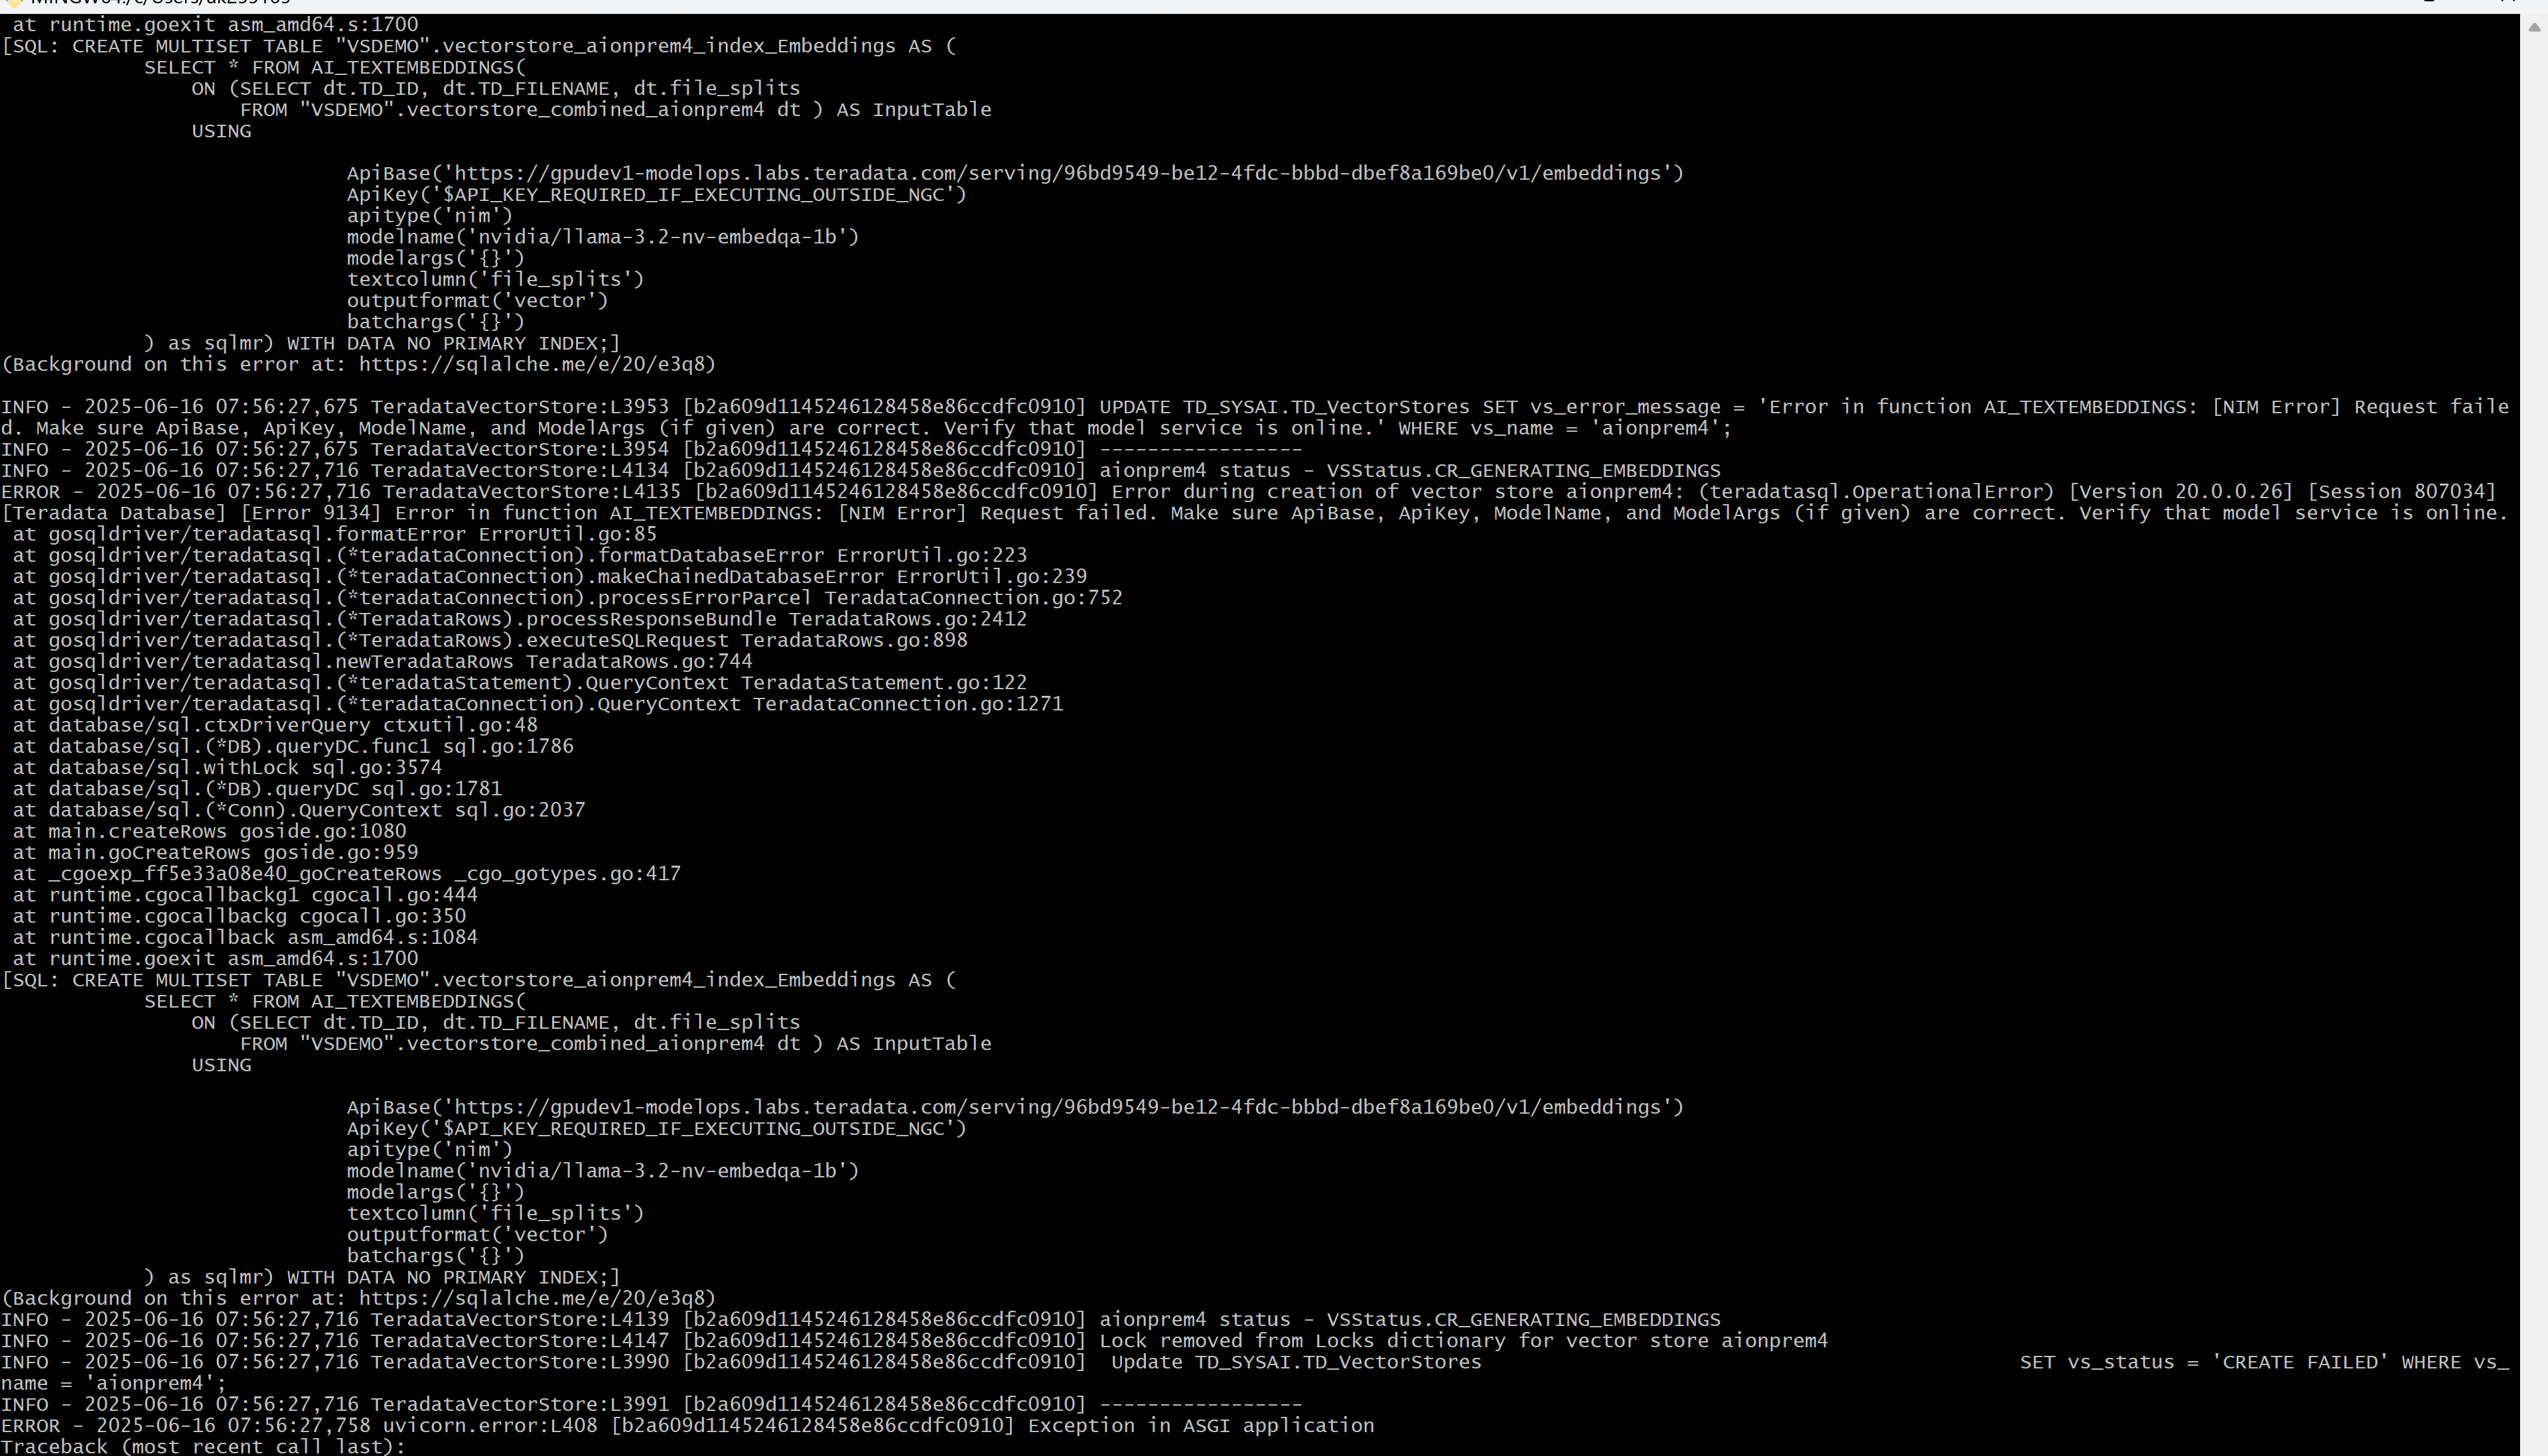

## 🔌 Disconnect  
- **Terminate All Active Connections**  
   - This operation terminates all active connections to the vector store database.


In [46]:
VSManager.disconnect()

Database connection closed.


In [ ]:
remove_context()